In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import sys
import os

# Define project Path in Colab
PROJECT_BASE_PATH = '/content/drive/MyDrive//Project_01' 

# ADD 'src' DIRECTORY TO PYTHON PATH
SRC_PATH = os.path.join(PROJECT_BASE_PATH, 'src')

# verify if SRC_PATH is already in sys.path
if SRC_PATH not in sys.path:
    sys.path.insert(0, SRC_PATH)
    print("✅ Successfully added 'src' directory to Python path.")

# IMPORT Paths CLASS FROM config MODULE
from config import Paths

--- Starting EDA on Enriched Data ---
✅ Loaded final training data. Shape: (307511, 125)

Total NaN count (Should be 0): 0

Target Variable Balance:
TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

Correlation of Macro Features with TARGET:
         TARGET
SELIC  0.004031
IPCA  -0.001223


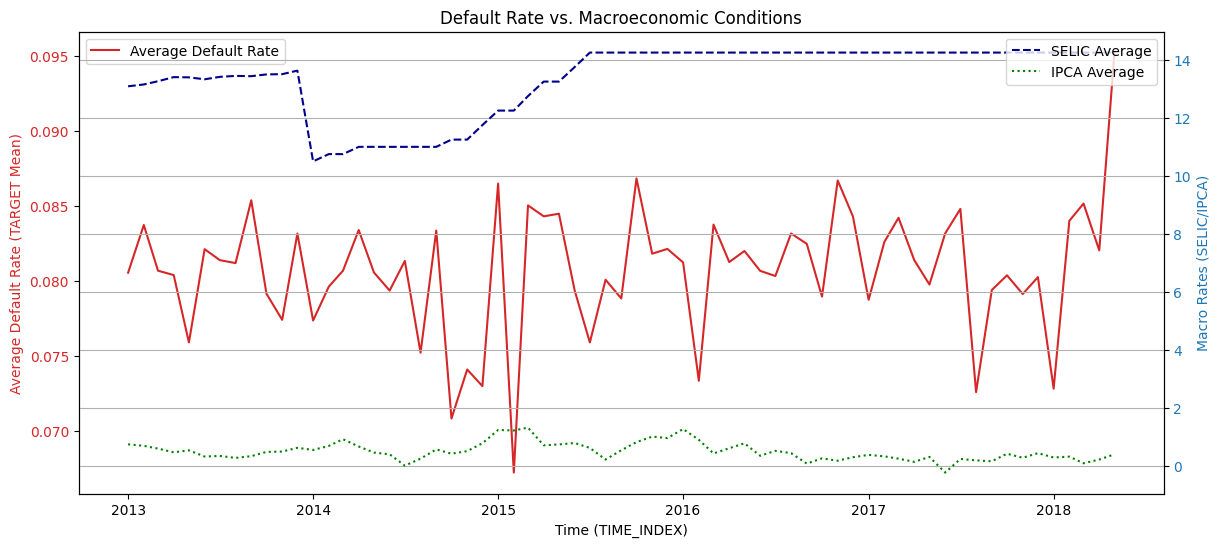

In [7]:
print("--- Starting EDA on Enriched Data ---")

DATA_DIR_PROCESSED = os.path.join(PROJECT_BASE_PATH, 'data', 'processed')
TRAIN_PROCESSED_FILE = os.path.join(DATA_DIR_PROCESSED, 'train_enriched.csv')

try:
    df_train_final = pd.read_csv(TRAIN_PROCESSED_FILE)
    
    # Restore TIME_INDEX to Period('M') type for temporal analysis
    df_train_final['TIME_INDEX'] = df_train_final['TIME_INDEX'].apply(lambda x: pd.Period(x, freq='M'))
    
    print(f"✅ Loaded final training data. Shape: {df_train_final.shape}")
    
except FileNotFoundError:
    print("❌ ERROR: Final processed file not found. Check your PROJECT_BASE_PATH.")
    df_train_final = None


if df_train_final is not None:
    # 1. Target Balance Check
    print(f"\nTotal NaN count (Should be 0): {df_train_final.isnull().sum().sum()}")

    target_balance = df_train_final['TARGET'].value_counts(normalize=True) * 100
    print("\nTarget Variable Balance:")
    print(target_balance)

    # 2. Correlation of Macro Features with TARGET
    print("\nCorrelation of Macro Features with TARGET:")
    macro_corr = df_train_final[['TARGET', 'SELIC', 'IPCA']].corr().iloc[0, 1:]
    print(macro_corr.to_frame())
    
    # 3. Temporal Visualization of Default Rate vs. Macro Rates
    
    # Calculate Mean Default Rate (TARGET) per Month
    default_rate_monthly = df_train_final.groupby('TIME_INDEX')['TARGET'].mean().to_frame()
    default_rate_monthly.index = default_rate_monthly.index.to_timestamp()
    
    # Calculate Mean Macro Rates per Month
    macro_monthly = df_train_final.groupby('TIME_INDEX')[['SELIC', 'IPCA']].mean()
    macro_monthly.index = macro_monthly.index.to_timestamp()
    
    # Plotting
    
    fig, ax1 = plt.subplots(figsize=(14, 6))
    
    # Plot Default Rate (Left Y-Axis)
    color = 'tab:red'
    ax1.set_xlabel('Time (TIME_INDEX)')
    ax1.set_ylabel('Average Default Rate (TARGET Mean)', color=color)
    ax1.plot(default_rate_monthly.index, default_rate_monthly['TARGET'], color=color, label='Average Default Rate')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.legend(loc='upper left')

    # Plot Macro Rates (Right Y-Axis)
    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Macro Rates (SELIC/IPCA)', color=color)
    ax2.plot(macro_monthly.index, macro_monthly['SELIC'], color='darkblue', linestyle='--', label='SELIC Average')
    ax2.plot(macro_monthly.index, macro_monthly['IPCA'], color='green', linestyle=':', label='IPCA Average')
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(loc='upper right')
    
    plt.title('Default Rate vs. Macroeconomic Conditions')
    plt.grid(True)
    plt.show()

Despite the low correlations observed in the macro feature analysis, further exploration using machine learning models that do not rely on strong correlations between dependent and independent variables may help reveal the potential influence of macro features on the model.

It is important to note that the micro data refers to Asian clients, whereas the macro data is sourced from Brazil, as this is an experimental project.